# Проект №3 "Дашборд конверсий"

### Шаг 1. Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import os
# from dotenv import load_dotenv

In [3]:
API_URL='https://data-charts-api.hexlet.app'
DATE_BEGIN = '2023-03-01'
DATE_END = '2023-09-01'

### Шаг 2. Выполним запросы к API

Запросим данные за период с 2023-03-01 по 2023-09-01:

#### Загружаем переменные окружения

In [2]:
# load_dotenv()

# API_URL = os.getenv('API_URL')
# DATE_BEGIN = os.getenv('DATE_BEGIN')
#DATE_END = os.getenv('DATE_END')

* *визиты*:

In [4]:
def get_visits(API_URL, DATE_BEGIN, DATE_END):
    r_visits = req.get(f'{API_URL}/visits?begin={DATE_BEGIN}&end={DATE_END}')
    json_visits = r_visits.json()
    api_visits = pd.DataFrame(json_visits)
    api_visits['datetime'] = pd.to_datetime(api_visits['datetime'])
    visits = api_visits
    return visits

visits = get_visits(API_URL, DATE_BEGIN, DATE_END)
visits.head(500000)

,datetime,platform,user_agent,visit_id
0,2023-03-01 23:17:37,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,2023-03-04 03:23:34,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,2023-03-01 12:57:13,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,f149f542-e935-4870-9734-6b4501eaf614
3,2023-03-01 13:07:19,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
4,2023-03-05 22:02:39,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
...,...,...,...,...
308866,2023-08-27 17:38:56,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,553eb09f-8809-429f-8f01-876f18305c96
308867,2023-08-27 03:54:11,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,cc664f35-6248-4953-81fd-1661cb91485c
308868,2023-08-29 00:33:03,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21
308869,2023-08-30 07:46:24,web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308871 entries, 0 to 308870
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   datetime    308871 non-null  datetime64[ns]
 1   platform    308871 non-null  object        
 2   user_agent  308871 non-null  object        
 3   visit_id    308871 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 9.4+ MB


In [6]:
print(visits['visit_id'].agg(['count', 'nunique']))

count      308871
nunique    170101
Name: visit_id, dtype: int64


* *регистрации*:

In [7]:
def get_registrations(API_URL, DATE_BEGIN, DATE_END):
    r_registrations = req.get(f'{API_URL}/registrations?begin={DATE_BEGIN}&end={DATE_END}')
    json_registrations = r_registrations.json()
    api_registrations = pd.DataFrame(json_registrations)
    api_registrations['datetime'] = pd.to_datetime(api_registrations['datetime'])
    registrations = api_registrations
    return registrations
    
registrations = get_registrations(API_URL, DATE_BEGIN, DATE_END)
registrations.head(100000)

,datetime,email,platform,registration_type,user_id
0,2023-03-01 13:21:20,jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,2023-03-01 01:14:06,dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,2023-03-01 19:47:32,kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,2023-03-01 19:19:26,fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,2023-03-01 02:30:54,johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b
...,...,...,...,...,...
28192,2023-08-31 20:51:43,lunazachary@example.com,ios,email,7065467a-39d2-46c7-9041-ed7fbc8d801f
28193,2023-08-31 23:07:32,amyramirez@example.org,ios,apple,93a04829-5ab4-48b5-abf9-8e267150c512
28194,2023-08-31 14:56:54,webermark@example.org,ios,apple,6ff0e3b5-af42-42ba-ae6e-395051d79360
28195,2023-08-31 22:52:45,alexandermichael@example.com,ios,email,6d8b00e7-4696-43b1-8d79-91f2b7bef9cd


In [8]:
registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28197 entries, 0 to 28196
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           28197 non-null  datetime64[ns]
 1   email              28197 non-null  object        
 2   platform           28197 non-null  object        
 3   registration_type  28197 non-null  object        
 4   user_id            28197 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ MB


In [9]:
registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28197 entries, 0 to 28196
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           28197 non-null  datetime64[ns]
 1   email              28197 non-null  object        
 2   platform           28197 non-null  object        
 3   registration_type  28197 non-null  object        
 4   user_id            28197 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ MB


### Шаг 3. Расчет метрик

In [10]:
def calc_and_save_conversion(visits, registrations):
    # удаляем строки с повторяющимися visit_id:
    unique_visits = visits.sort_values(by='datetime', ascending=False).drop_duplicates(subset = 'visit_id')
    # фильтруем строки от ботов:
    unique_visits = unique_visits[unique_visits['user_agent']!='bot']
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    unique_visits['datetime'] = unique_visits['datetime'].dt.strftime('%Y-%m-%d')
    # группировка данных по полям "datetime", "platform" и сортировка по полю "datetime" от ранних дат к поздним:
    unique_visits = unique_visits.sort_values('datetime').groupby(['datetime', 'platform']).agg({'visit_id': 'count'}).reset_index()
    unique_visits = unique_visits.rename(columns={'datetime': 'date_group', 'visit_id': 'visits'})
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    registrations['datetime'] = registrations['datetime'].dt.strftime('%Y-%m-%d')
    # группировка данных по полям "datetime", "platform" и сортировка по полю "datetime" от ранних дат к поздним:
    upd_registrations = registrations.sort_values('datetime').groupby(['datetime', 'platform']).agg({'user_id': 'count'}).reset_index()
    upd_registrations = upd_registrations.rename(columns={'datetime': 'date_group', 'user_id': 'registrations'})
    # объединение датафреймов visits, registrations:
    vis_regs = pd.merge(
        unique_visits, upd_registrations,
        left_on=['date_group', 'platform'],
        right_on=['date_group', 'platform'])
    # расчет конверсии:
    vis_regs['conversion'] = (vis_regs['registrations'] / vis_regs['visits'] * 100).round(2)
    # сохранение датафрейма с конверсией в формате JSON:
    vis_regs_conv = vis_regs.copy()
    vis_regs_conv.to_json('./conversion.json', orient='columns')
    return vis_regs_conv # датафрейм с конверсией
    
df_conversion = calc_and_save_conversion(visits, registrations)
df_conversion.head(1000)

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,264,218,82.58
1,2023-03-01,ios,78,67,85.90
2,2023-03-01,web,333,78,23.42
3,2023-03-02,android,106,91,85.85
4,2023-03-02,ios,103,76,73.79
...,...,...,...,...,...
547,2023-08-30,ios,40,32,80.00
548,2023-08-30,web,653,18,2.76
549,2023-08-31,android,80,67,83.75
550,2023-08-31,ios,16,13,81.25


In [11]:
df_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_group     552 non-null    object 
 1   platform       552 non-null    object 
 2   visits         552 non-null    int64  
 3   registrations  552 non-null    int64  
 4   conversion     552 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.7+ KB


### Шаг 4. Присоединим данные по рекламным кампаниям к датафрейму с расчетом конверсии

In [12]:
def get_ads(path):
    # чтение данных по рекламным кампаниям из файла *ads.csv*
    ads = pd.read_csv(f'{path}')
    ads['date'] = pd.to_datetime(ads['date'])
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    ads['date'] = ads['date'].dt.strftime('%Y-%m-%d')
    ads = ads.rename(columns={'date': 'date_group'})
    return ads
    
ads = get_ads('./ads.csv')
ads.head(1000)

,date_group,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,virtual_reality_workshop,238
1,2023-03-02,google,cpc,virtual_reality_workshop,164
2,2023-03-03,google,cpc,virtual_reality_workshop,240
3,2023-03-04,google,cpc,virtual_reality_workshop,167
4,2023-03-05,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
175,2023-09-05,yandex,cpc,cybersecurity_special,221
176,2023-09-06,yandex,cpc,cybersecurity_special,124
177,2023-09-07,yandex,cpc,cybersecurity_special,211
178,2023-09-08,yandex,cpc,cybersecurity_special,195


In [13]:
def get_save_conversion_ads(visits, registrations):
    # объединение датафреймов по рекламе и конверсии
    visits = get_visits(API_URL, DATE_BEGIN, DATE_END)
    registrations = get_registrations(API_URL, DATE_BEGIN, DATE_END)
    df_conversion = calc_and_save_conversion(visits, registrations)
    ads = get_ads('./ads.csv')
    # объединение датафреймов по рекламе и конверсии
    df_conversion_ads = pd.merge(
        df_conversion, ads,
        left_on='date_group',
        right_on='date_group',
        how='inner')
    # удаление лишних столбцов "utm_source", "utm_medium":
    df_conversion_ads = df_conversion_ads.drop(['platform', 'conversion', 'utm_source', 'utm_medium'], axis=1)
    # замена пропусков по столбцам "cost", "utm_campaign" значениями "none" и "0" соответственно:
    df_conversion_ads = df_conversion_ads.fillna({'utm_campaign': 'none', 'cost':0})
    # группировка и сортировка данных от ранних дат к поздним по столбцу "date_group":
    df_conversion_ads = df_conversion_ads.sort_values('date_group').groupby(['date_group', 'utm_campaign']).sum().reset_index()
    # изменение порядка столбцов "cost", "utm_campaign" согласно требованиям:
    df_conversion_ads = df_conversion_ads[['date_group', 'visits', 'registrations', 'cost', 'utm_campaign']]
    # сохранение датафрейма с рекламными кампаниями в формате JSON:
    df_conversion_ads.to_json('./ads.json', orient='columns')
    return df_conversion_ads  # ранее 'conv_ads', 'upd_cnv_ads'

cnv_ads = get_save_conversion_ads(visits, registrations)
cnv_ads.head(1000)

,date_group,visits,registrations,cost,utm_campaign
0,2023-03-01,675,363,714,virtual_reality_workshop
1,2023-03-02,671,219,492,virtual_reality_workshop
2,2023-03-03,1529,338,720,virtual_reality_workshop
3,2023-03-04,2083,278,501,virtual_reality_workshop
4,2023-03-05,2321,362,804,virtual_reality_workshop
...,...,...,...,...,...
166,2023-08-27,671,130,870,cybersecurity_special
167,2023-08-28,674,88,750,cybersecurity_special
168,2023-08-29,1178,132,405,cybersecurity_special
169,2023-08-30,740,90,390,cybersecurity_special


### Шаг 5. Визуализация расчетов

In [14]:
def charts(cnv_ads, df_conversion, registrations, ads, DATE_BEGIN, DATE_END):
    # график 'Total_visits_chart'
    fig, ax = plt.subplots(figsize=(15,10), tight_layout=True)
    bars = plt.bar(x='date_group', height='visits', zorder=2, data=cnv_ads)
    ax.bar_label(bars)
    plt.title('Total visits', fontsize=18)
    plt.xlabel('date_group')
    plt.ylabel('visits')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(axis='both', which='major', length=7)
    plt.xticks(rotation=70)
    plt.grid(axis='y')
    plt.savefig('./charts/Total_visits_chart.png')
    plt.close(fig)


    # график 'Total_visits_by_platform_chart'
    fig, ax = plt.subplots(figsize=(15,10), tight_layout=True)
    df_conversion_pvt = df_conversion.pivot_table(index='date_group', columns='platform', values='visits')
    df_conversion_pvt.plot(kind='bar', stacked=True, ax=ax, zorder=2)
    plt.title('Visits by Platform (Stacked)', fontsize=24)
    plt.xlabel('Date_group', fontsize=19)
    plt.ylabel('Visits', fontsize=19)
    ax.tick_params(axis='both', labelsize=16)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(which='major', length=7)
    plt.xticks(rotation=70)
    plt.grid(axis='y')
    plt.savefig('./charts/Total_visits_by_platform_chart.png')
    plt.close(fig)


    # график 'Total_registrations_chart'
    fig, ax = plt.subplots(figsize=(15,10), tight_layout=True)
    bars = plt.bar(x='date_group', height='registrations', zorder=2, data=cnv_ads)
    ax.bar_label(bars)
    plt.title('Total registrations', fontsize=16)
    plt.xlabel('date_group')
    plt.ylabel('registrations')
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(axis='both', which='major', length=7)
    plt.xticks(rotation=70)
    plt.grid(axis='y')
    plt.savefig('./charts/Total_registrations_chart.png')
    plt.close(fig)


    # график 'Total_registrations_by_platform_chart'
    fig, ax = plt.subplots(figsize=(15,10), tight_layout=True)
    df_conversion_pvt1 = df_conversion.pivot_table(index='date_group', columns='platform', values='registrations')
    df_conversion_pvt1.plot(kind='bar', stacked=True, ax=ax, zorder=2)
    plt.title('Total Registrations by Platform (Stacked)', fontsize=24)
    plt.legend(fontsize=16)
    plt.xlabel('Date_group', fontsize=19)
    plt.ylabel('Registrations', fontsize=19)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(axis='both', labelsize=15, which='major', length=7)
    plt.xticks(rotation=70)
    plt.grid(axis='y')
    plt.savefig('./charts/Total_registrations_by_platform_chart.png')
    plt.close()


    # график 'Total_registr_by_type_chart'
    registrations['datetime'] = registrations['datetime'].astype('datetime64[ns]')
    # приведение значений в столбце "datetime" к формату "YYYY-MM-DD":
    registrations['datetime'] = registrations['datetime'].dt.strftime('%Y-%m-%d')
    # группировка данных по полям "datetime", "platform" и сортировка по полю "datetime" от ранних дат к поздним:
    upd_regs = registrations.sort_values('datetime').groupby(['datetime', 'registration_type']).agg({'user_id': 'count'}).reset_index()
    upd_regs = upd_regs.rename(columns={'datetime': 'date_group', 'user_id': 'registrations'})
    
    fig, ax = plt.subplots(figsize=(15,10), tight_layout=True)
    upd_regs_pvt = upd_regs.pivot_table(index='date_group', columns='registration_type', values='registrations')
    upd_regs_pvt.plot(kind='bar', stacked=True, ax=ax, zorder=2)
    plt.title('Total Registrations by Registration Type (Stacked)', fontsize=24)
    plt.legend(fontsize=16)
    plt.xlabel('Date_group', fontsize=19)
    plt.ylabel('Registrations', fontsize=19)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(axis='both', labelsize=15, which='major', length=7)
    plt.xticks(rotation=70)
    plt.grid(axis='y')
    plt.savefig('./charts/Total_registr_by_type_chart.png')
    plt.close()


    # график 'Total_registr_by_platform_piechart'
    fig, axes = plt.subplots(1,2, figsize=(15,10), tight_layout=True)
    df_conversion.groupby(['platform']).sum().plot(ax=axes[0], kind='pie', y='registrations', autopct='%1.1f%%', fontsize=16, wedgeprops={"linewidth": 1, "edgecolor": "white"}, legend=False)
    upd_regs.groupby(['registration_type']).sum().plot(ax=axes[1], kind='pie', y='registrations', autopct='%1.1f%%', fontsize=16, wedgeprops={"linewidth": 1, "edgecolor": "white"}, legend=False)
    axes[0].set_title('Registrations by Platform', fontsize=20)
    axes[1].set_title('Registrations by Type', fontsize=20)
    plt.savefig('./charts/Total_registr_by_platform_piechart.png')
    plt.close(fig)


    # график 'Overall_conversion_chart'
    overall_conversion = cnv_ads.copy()
    overall_conversion['overall_conversion'] = (overall_conversion['registrations'] / overall_conversion['visits'] * 100).round(1)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    fig.suptitle('Overall Conversion', fontsize=19)
    x = overall_conversion['date_group']
    y = overall_conversion['overall_conversion']
    ax.plot(x, y,
            marker="o",
            c="b",
            label='Общая конверсия',
            linewidth=2,
            markersize=6)
    for x,y in zip(x,y):
        label = "{:.0f}%".format(y)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center')
    mean_conversion = overall_conversion['overall_conversion'].mean()
    ax.axhline(y=mean_conversion, color='gray', linestyle='dashed', label='Average Conversion')
    ax.legend()
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Conversion (%)', fontsize=14)
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(axis='both', labelsize=9, which='major', length=7)
    plt.xticks(rotation=45)
    ax.grid(axis='y')
    plt.savefig('./charts/Overall_conversion_chart.png')
    plt.close(fig)


    # график 'Conversion_by_platform_chart'
    df_conversion_pvt = df_conversion.pivot_table(index='date_group', columns='platform', values='conversion')
    df_conversion_pvt.reset_index(inplace=True)
    fig, axes = plt.subplots(3,1, figsize=(20,22))

    x = df_conversion_pvt['date_group']
    y = df_conversion_pvt['android']
    axes[0].plot(x, y,
            marker="o",
            c="c",
            label='android',
            linewidth=2,
            markersize=10,
            zorder=2)
    axes[0].legend(fontsize=16)
    axes[0].set_title('Conversion android', fontsize=16)
    axes[0].set_xlabel('Date', fontsize=14)
    axes[0].set_ylabel('Conversion (%)', fontsize=14)
    axes[0].set_xticks(df_conversion_pvt['date_group'])
    axes[0].set_xticklabels(df_conversion_pvt['date_group'], fontsize=14, rotation=45)
    axes[0].grid(axis='y')
    
    x1 = df_conversion_pvt['date_group']
    y1 = df_conversion_pvt['ios']
    axes[1].plot(x1, y1,
            marker="o",
            c="c",
            label='ios',
            linewidth=2,
            markersize=10,
            zorder=2)
    axes[1].legend(fontsize=16)
    axes[1].set_title('Conversion ios', fontsize=16)
    axes[1].set_xlabel('Date', fontsize=14)
    axes[1].set_ylabel('Conversion (%)', fontsize=14)
    axes[1].set_xticks(df_conversion_pvt['date_group'])
    axes[1].set_xticklabels(df_conversion_pvt['date_group'], fontsize=14, rotation=45)
    axes[1].grid(axis='y')

    x2 = df_conversion_pvt['date_group']
    y2 = df_conversion_pvt['web']
    axes[2].plot(x2, y2,
            marker="o",
            c="c",
            label='web',
            linewidth=2,
            markersize=10,
            zorder=2)
    axes[2].legend(fontsize=16)
    axes[2].set_title('Conversion web', fontsize=16)
    axes[2].set_xlabel('Date', fontsize=14)
    axes[2].set_ylabel('Conversion (%)', fontsize=14)
    axes[2].set_xticks(df_conversion_pvt['date_group'])
    axes[2].set_xticklabels(df_conversion_pvt['date_group'], fontsize=14, rotation=45)
    axes[2].grid(axis='y')
    plt.tight_layout()
    plt.savefig('./charts/Conversion_by_platform_chart.png')
    plt.close(fig)


    # график 'Avg_conversion_chart'
    avg_conversion = df_conversion.groupby('date_group')['conversion'].mean().reset_index()
    fig, ax = plt.subplots()
    fig.set_size_inches(12,10)
    x = avg_conversion['date_group']
    y = avg_conversion['conversion']
    ax.plot(x, y,
            marker="o",
            c="g",
            label='Средняя конверсия',
            linewidth=1.5,
            markersize=6)
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Conversion (%)')
    ax.grid(axis='y')
    plt.title('Average Conversion', fontsize=16)
    plt.xticks(avg_conversion['date_group'], rotation=65)
    plt.savefig('./charts/Avg_conversion_chart.png')
    plt.close(fig)


    # график 'Adcosts_chart'
    adcosts = ads[(ads['date_group'] > DATE_BEGIN) & (ads['date_group'] < DATE_END)].groupby('date_group')['cost'].mean().reset_index()
    # adcosts = ads.groupby('date_group')['cost'].mean().reset_index()
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    x = adcosts['date_group']
    y = adcosts['cost']
    ax.plot(x, y,
            marker="o",
            c="g",
            label='Средняя цена',
            linewidth=1.5,
            markersize=6)
    plt.title('Aggregated Ad Campaign Costs (by day)')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cost (RUB)', fontsize=12)
    plt.xticks(adcosts['date_group'], fontsize=10, rotation=45)
    ax.grid(axis='y')
    plt.savefig('./charts/Adcosts_chart.png')
    plt.close(fig)


    # график'Visits_and_registrations_chart':
    # отбор дат рекламных кампаний
    campaign_days = cnv_ads[['date_group', 'utm_campaign']]
    
    virtual_reality_workshop = campaign_days.loc[campaign_days['utm_campaign'] == 'virtual_reality_workshop']
    start_date = virtual_reality_workshop['date_group'].min()
    end_date = virtual_reality_workshop['date_group'].max()
    
    game_dev_crash_course = campaign_days.loc[campaign_days['utm_campaign'] == 'game_dev_crash_course']
    start_date = game_dev_crash_course['date_group'].min()
    end_date = game_dev_crash_course['date_group'].max()
    
    web_dev_workshop_series = campaign_days.loc[campaign_days['utm_campaign'] == 'web_dev_workshop_series']
    start_date = web_dev_workshop_series['date_group'].min()
    end_date = web_dev_workshop_series['date_group'].max()
    
    tech_career_fair = campaign_days.loc[campaign_days['utm_campaign'] == 'tech_career_fair']
    start_date = tech_career_fair['date_group'].min()
    end_date = tech_career_fair['date_group'].max()
    
    cybersecurity_special = campaign_days.loc[campaign_days['utm_campaign'] == 'cybersecurity_special']
    start_date = cybersecurity_special['date_group'].min()
    end_date = cybersecurity_special['date_group'].max()
    
    # создание датафрейма с периодами проведения рекламных кампаний
    periods_of_ads = pd.DataFrame(columns=['start_date', 'end_date', 'utm_campaign'])
    periods_of_ads['start_date'] = [virtual_reality_workshop['date_group'].min(), game_dev_crash_course['date_group'].min(), web_dev_workshop_series['date_group'].min(), tech_career_fair['date_group'].min(), cybersecurity_special['date_group'].min()]
    periods_of_ads['end_date'] = [virtual_reality_workshop['date_group'].max(), game_dev_crash_course['date_group'].max(), web_dev_workshop_series['date_group'].max(), tech_career_fair['date_group'].max(), cybersecurity_special['date_group'].max()]
    periods_of_ads['utm_campaign'] = ['virtual_reality_workshop', 'game_dev_crash_course', 'web_dev_workshop_series', 'tech_career_fair', 'cybersecurity_special']
    
    ads_started = periods_of_ads['start_date'].to_list()
    ads_ended = periods_of_ads['end_date'].to_list()

    fig, axes = plt.subplots(2, 1, figsize=(22,20))
    visits_campaign = cnv_ads.groupby(['date_group'])['visits'].sum().reset_index()
    x = visits_campaign['date_group']
    y = visits_campaign['visits']
    axes[0].plot(x, y,
            marker="o",
            c="c",
            label='Visits',
            linewidth=2,
            markersize=6)
    avg_visits = cnv_ads['visits'].mean()
    axes[0].axhline(y=avg_visits, color='gray', linestyle='dashed', label='Average Number of Visits')
    for i in range(len(ads_started)):
        axes[0].axvspan(ads_started[i], ads_ended[i], alpha=0.3, color=np.random.rand(3,), label=periods_of_ads['utm_campaign'].to_list()[i])
    axes[0].set_title('Visits during marketing active days', fontsize=22)
    axes[0].set_ylabel('Unique Visits', fontsize=20)
    axes[0].set_xticks(visits_campaign['date_group'])
    axes[0].set_xticklabels(visits_campaign['date_group'], fontsize=14, rotation=45)
    axes[0].legend(fontsize=14, loc='upper right')
    axes[0].grid(axis='y')
    registr_campaign = cnv_ads.groupby(['date_group'])['registrations'].sum().reset_index()
    x3 = registr_campaign['date_group']
    y3 = registr_campaign['registrations']
    axes[1].plot(x3, y3,
            marker="o",
            c="c",
            label='Registrations',
            linewidth=2,
            markersize=6)
    avg_registrations = cnv_ads['registrations'].mean()
    axes[1].axhline(y=avg_registrations, color='gray', linestyle='dashed', label='Average Number of Registrations')
    for i in range(len(ads_started)):
        axes[1].axvspan(ads_started[i], ads_ended[i], alpha=0.3, color=np.random.rand(3,), label=periods_of_ads['utm_campaign'].to_list()[i])
    axes[1].set_title('Registrations during marketing active days', fontsize=22)
    axes[1].set_ylabel('Unique Users', fontsize=20)
    axes[1].set_xticks(registr_campaign['date_group'])
    axes[1].set_xticklabels(registr_campaign['date_group'], fontsize=14, rotation=45)
    axes[1].legend(fontsize=14, loc='upper right')
    axes[1].grid(axis='y')
    plt.savefig('./charts/Visits_and_registrations_chart.png')
    plt.close(fig)

In [15]:
def run_all():
    visits = get_visits(API_URL, DATE_BEGIN, DATE_END)
    registrations = get_registrations(API_URL, DATE_BEGIN, DATE_END)
    df_conversion = calc_and_save_conversion(visits, registrations)
    ads = get_ads('./ads.csv')
    cnv_ads = get_save_conversion_ads(visits, registrations)
    charts(cnv_ads, df_conversion, registrations, ads, DATE_BEGIN, DATE_END)

In [16]:
if __name__ == "__main__":
    run_all()

### Дополнительные графики для презентации

In [17]:
# Cтолбчатый график итоговых визитов за каждый месяц:
total_visits_chart = cnv_ads.copy()
total_visits_chart['date_group'] = total_visits_chart['date_group'].astype('datetime64[ns]')
# total_visits_chart['week_day'] = pd.DatetimeIndex(total_visits_chart['date_group']).weekday
total_visits_chart['month'] = pd.DatetimeIndex(total_visits_chart['date_group']).month
# total_visits_chart['year'] = pd.DatetimeIndex(total_visits_chart['date_group']).year
total_visits_chart = total_visits_chart.groupby(['month'])['visits'].sum().reset_index()
total_visits_chart.head()

,month,visits
0,3,75253
1,4,22735
2,5,6624
3,6,11070
4,7,18664


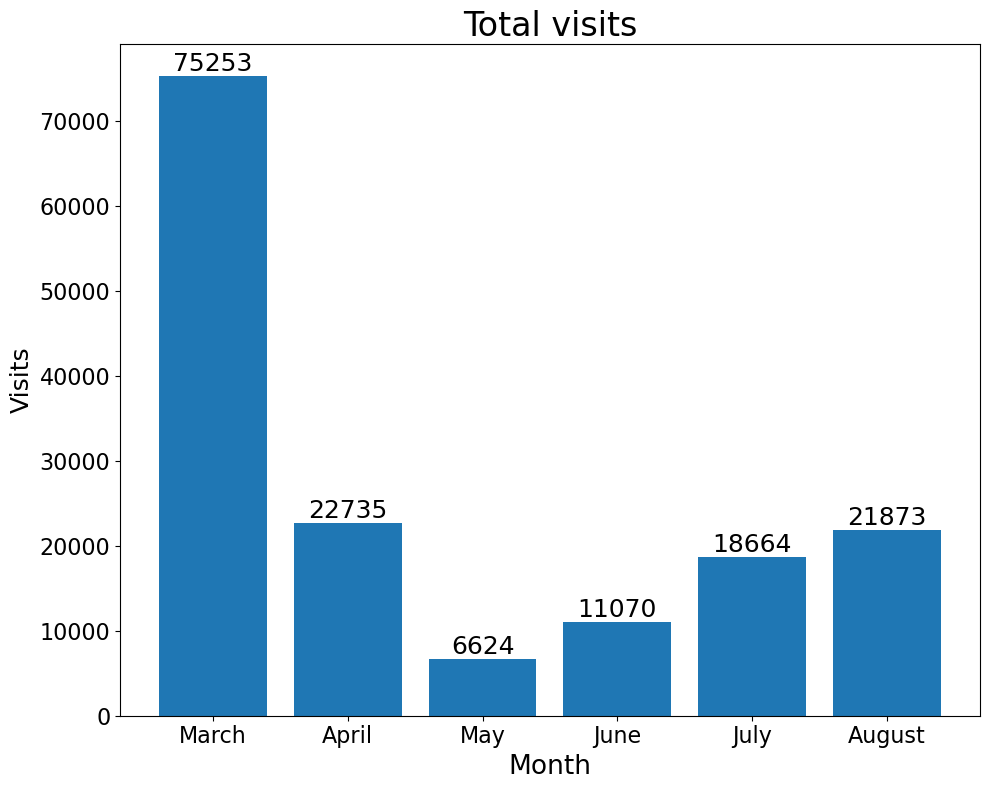

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.bar(x='month', height='visits', data=total_visits_chart)
ax.bar_label(bars, fontsize=18)
plt.title('Total visits', fontsize=24)
plt.xlabel('Month', fontsize=19)
plt.ylabel('Visits', fontsize=18)
plt.xticks(total_visits_chart['month'],['March', 'April', 'May', 'June', 'July', 'August'], fontsize=14)
ax.tick_params(axis='both', labelsize=16)
# plt.grid()
plt.tight_layout()
plt.savefig('./charts_for_presentation/Total_visits_by_month_chart.png')

In [19]:
# Cтолбчатый график итоговых регистраций за каждый месяц:
total_registrations_chart = cnv_ads.copy()
total_registrations_chart['date_group'] = total_registrations_chart['date_group'].astype('datetime64[ns]')
# total_visits_chart['date_group'] = pd.to_datetime(total_visits_chart['date_group'], format='%Y-%m-%dT%H:%M:%S')
# total_visits_chart['week_day'] = pd.DatetimeIndex(total_visits_chart['date_group']).weekday
total_registrations_chart['month'] = pd.DatetimeIndex(total_registrations_chart['date_group']).month
# total_visits_chart['year'] = pd.DatetimeIndex(total_visits_chart['date_group']).year
total_registrations_chart = total_registrations_chart.groupby(['month'])['registrations'].sum().reset_index()
total_registrations_chart.head(6)

,month,registrations
0,3,12868
1,4,4148
2,5,934
3,6,1979
4,7,3556
5,8,3403


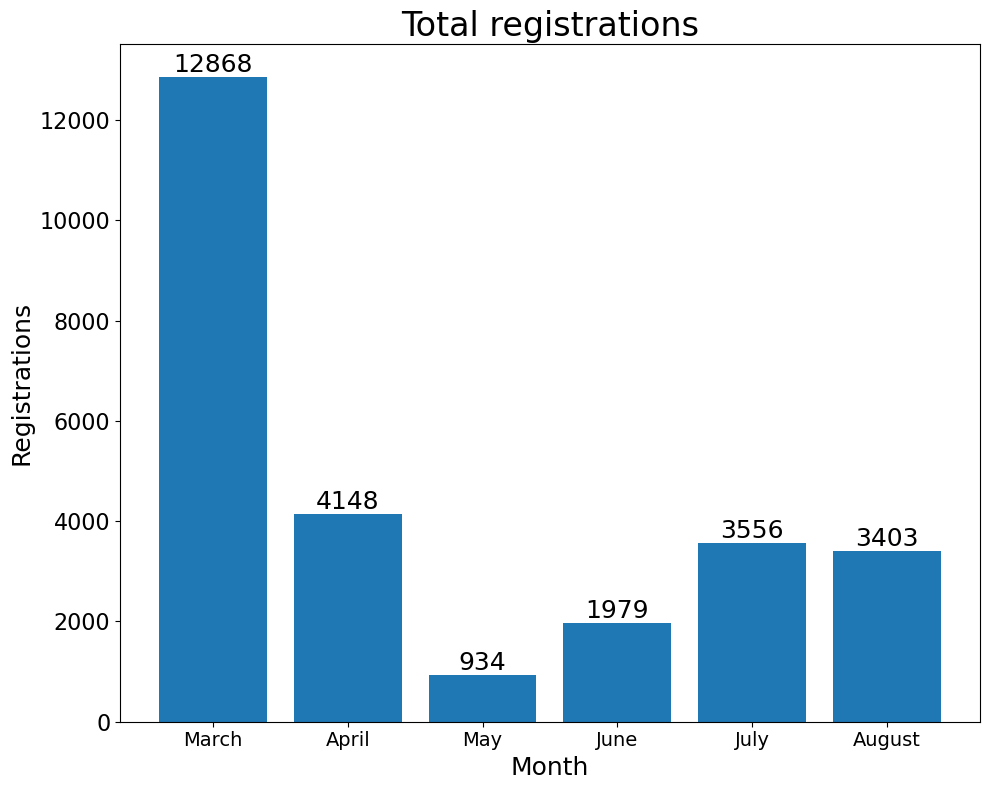

In [58]:
fig, ax = plt.subplots(figsize=(10,8))
bars = plt.bar(x='month', height='registrations', data=total_registrations_chart)
ax.bar_label(bars, fontsize=18)
plt.title('Total registrations', fontsize=24)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Registrations', fontsize=18)
ax.tick_params(axis='both', labelsize=16)
plt.xticks(total_registrations_chart['month'],['March', 'April', 'May', 'June', 'July', 'August'], fontsize=14)
# plt.grid()
plt.tight_layout()
plt.savefig('./charts_for_presentation/Total_registrations_by_month_chart.png')

In [21]:
total_costs = cnv_ads['cost'].sum()
print(total_costs) # общие расходы на рекламу по таблице конверсии, соединенной с расходами на рекламу

99357


In [22]:
total_costs_by_campaign = cnv_ads.copy()
total_costs_by_campaign['date_group'] = total_costs_by_campaign['date_group'].astype('datetime64[ns]')
# total_costs_by_campaign['date_group'] = pd.to_datetime(total_costs_by_campaign['date_group'], format='%Y-%m-%dT%H:%M:%S')
# total_costs_by_campaign['week_day'] = pd.DatetimeIndex(total_costs_by_campaign['date_group']).weekday
total_costs_by_campaign['month'] = pd.DatetimeIndex(total_costs_by_campaign['date_group']).month
# total_costs_by_campaign['year'] = pd.DatetimeIndex(total_costs_by_campaign['date_group']).year

# расходы в месяц по каждой utm_campaign:
total_costs_by_campaign_per_month = total_costs_by_campaign.groupby(['month', 'utm_campaign'])[['cost', 'visits', 'registrations']].sum().reset_index()
# ежемесячные расходы на рекламу:
total_costs_per_month = total_costs_by_campaign.groupby(['month'])[['cost', 'visits', 'registrations']].sum().reset_index()
# расходы по каждой utm_campaign за исследуемый период:
total_costs_by_utm_campaign = total_costs_by_campaign.groupby(['utm_campaign'])[['cost', 'visits', 'registrations']].sum().reset_index()

In [23]:
total_costs_by_campaign_per_month['conversion'] = (total_costs_by_campaign_per_month['registrations'] / total_costs_by_campaign_per_month['visits'] * 100).round(2)
total_costs_by_campaign_per_month.head(100) # расходы в месяц по каждой utm_campaign

,month,utm_campaign,cost,visits,registrations,conversion
0,3,virtual_reality_workshop,16866,75253,12868,17.10
1,4,game_dev_crash_course,12510,19225,3553,18.48
2,4,virtual_reality_workshop,2889,3510,595,16.95
3,5,game_dev_crash_course,4650,3634,440,12.11
4,5,web_dev_workshop_series,14433,2990,494,16.52
5,6,tech_career_fair,6603,3583,655,18.28
6,6,web_dev_workshop_series,7221,7487,1324,17.68
7,7,cybersecurity_special,1818,1949,345,17.70
8,7,tech_career_fair,14316,16715,3211,19.21
9,8,cybersecurity_special,18051,21873,3403,15.56


In [24]:
total_costs_per_month.head(100) # ежемесячные расходы на рекламу

,month,cost,visits,registrations
0,3,16866,75253,12868
1,4,15399,22735,4148
2,5,19083,6624,934
3,6,13824,11070,1979
4,7,16134,18664,3556
5,8,18051,21873,3403


In [69]:
total_costs_by_utm_campaign.head(100) # расходы по каждой utm_campaign за исследуемый период

,utm_campaign,cost,visits,registrations
0,cybersecurity_special,19869,23822,3748
1,game_dev_crash_course,17160,22859,3993
2,tech_career_fair,20919,20298,3866
3,virtual_reality_workshop,19755,78763,13463
4,web_dev_workshop_series,21654,10477,1818


In [26]:
registrations_by_types = registrations.copy() 
# registrations_by_types['datetime'] = registrations_by_types['datetime'].astype('datetime64[ns]')
registrations_by_types = registrations_by_types.sort_values('datetime').groupby(['datetime', 'registration_type']).agg({'user_id': 'count'}).reset_index()
registrations_by_types = registrations_by_types.rename(columns={'datetime': 'date_group', 'user_id': 'registrations'})
registrations_by_types['month'] = pd.DatetimeIndex(registrations_by_types['date_group']).month
registrations_by_types_per_month = registrations_by_types.groupby(['month', 'registration_type'])['registrations'].sum().reset_index()

In [27]:
# для 13-го  слайда Total Registrations by Registration Type (Stacked)
pvt_registration_types = registrations_by_types_per_month.pivot_table(index='month', columns='registration_type', values='registrations').reset_index()
pvt_registration_types.head(100)

registration_type,month,apple,email,google,yandex
0,3,2323.0,5404.0,4216.0,925.0
1,4,821.0,1855.0,1381.0,358.0
2,5,179.0,414.0,297.0,82.0
3,6,446.0,1045.0,796.0,174.0
4,7,669.0,1795.0,1324.0,290.0
5,8,650.0,1464.0,1032.0,257.0


In [65]:
pvt_registration_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   6 non-null      int32  
 1   apple   6 non-null      float64
 2   email   6 non-null      float64
 3   google  6 non-null      float64
 4   yandex  6 non-null      float64
dtypes: float64(4), int32(1)
memory usage: 348.0 bytes


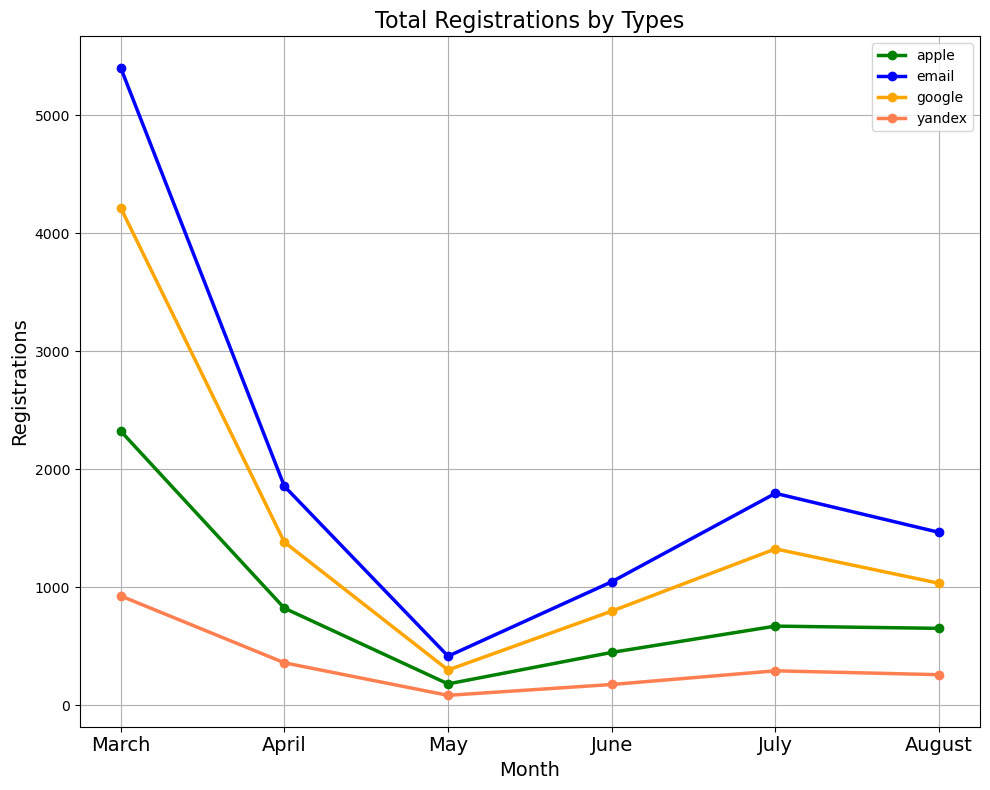

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
x = pvt_registration_types['month']
y1 = pvt_registration_types['apple']
y2 = pvt_registration_types['email']
y3 = pvt_registration_types['google']
y4 = pvt_registration_types['yandex']
ax.plot(x, y1, color='green', marker="o", linewidth=2.5, markersize=6, label='apple')
ax.plot(x, y2, color='blue', marker="o", linewidth=2.5, markersize=6, label='email')
ax.plot(x, y3, color='orange', marker="o", linewidth=2.5, markersize=6, label='google')
ax.plot(x, y4, color='coral', marker="o", linewidth=2.5, markersize=6, label='yandex')
plt.title('Total Registrations by Types', fontsize=16)
plt.legend()
plt.xlabel('Month', fontsize=14)
plt.ylabel('Registrations', fontsize=14)
plt.xticks(pvt_registration_types['month'],['March', 'April', 'May', 'June', 'July', 'August'], fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('./charts_for_presentation/Total_registrations_by_month_types_chart.png')

In [29]:
# для 11-го слайда с графиком Visits by Platform (Stacked)
total_visits_by_platform = df_conversion.copy()
total_visits_by_platform['date_group'] = total_visits_by_platform['date_group'].astype('datetime64[ns]')
total_visits_by_platform['month'] = pd.DatetimeIndex(total_visits_by_platform['date_group']).month
total_visits_by_platform_per_month = total_visits_by_platform.groupby(['month', 'platform'])['visits'].sum().reset_index()
pvt_total_visits_by_platform = total_visits_by_platform_per_month.pivot_table(index='month', columns='platform', values='visits').reset_index()
pvt_total_visits_by_platform.head(100)

platform,month,android,ios,web
0,3,8155.0,3367.0,63731.0
1,4,2331.0,1037.0,21241.0
2,5,545.0,205.0,6167.0
3,6,1463.0,567.0,11617.0
4,7,2452.0,907.0,17474.0
5,8,1857.0,938.0,19078.0


In [30]:
# для 12-го слайда Total Registrations by Platform (Stacked)
total_registrations_by_platform = df_conversion.copy()
total_registrations_by_platform['date_group'] = total_registrations_by_platform['date_group'].astype('datetime64[ns]')
total_registrations_by_platform['month'] = pd.DatetimeIndex(total_registrations_by_platform['date_group']).month
total_registrations_by_platform_per_month = total_registrations_by_platform.groupby(['month', 'platform'])['registrations'].sum().reset_index()
pvt_total_registrations_by_platform = total_registrations_by_platform_per_month.pivot_table(index='month', columns='platform', values='registrations').reset_index()
pvt_total_registrations_by_platform.head(100)

platform,month,android,ios,web
0,3,6376.0,2703.0,3789.0
1,4,2083.0,875.0,1457.0
2,5,428.0,163.0,381.0
3,6,1232.0,487.0,742.0
4,7,2099.0,779.0,1200.0
5,8,1542.0,793.0,1068.0


In [32]:
overall_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_group          171 non-null    object 
 1   visits              171 non-null    int64  
 2   registrations       171 non-null    int64  
 3   cost                171 non-null    int64  
 4   utm_campaign        171 non-null    object 
 5   overall_conversion  171 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 8.1+ KB


In [33]:
overall_conversion.head(1000)

,date_group,visits,registrations,cost,utm_campaign,overall_conversion
0,2023-03-01,675,363,714,virtual_reality_workshop,53.8
1,2023-03-02,671,219,492,virtual_reality_workshop,32.6
2,2023-03-03,1529,338,720,virtual_reality_workshop,22.1
3,2023-03-04,2083,278,501,virtual_reality_workshop,13.3
4,2023-03-05,2321,362,804,virtual_reality_workshop,15.6
...,...,...,...,...,...,...
166,2023-08-27,671,130,870,cybersecurity_special,19.4
167,2023-08-28,674,88,750,cybersecurity_special,13.1
168,2023-08-29,1178,132,405,cybersecurity_special,11.2
169,2023-08-30,740,90,390,cybersecurity_special,12.2


In [35]:
cnv_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_group     171 non-null    object
 1   visits         171 non-null    int64 
 2   registrations  171 non-null    int64 
 3   cost           171 non-null    int64 
 4   utm_campaign   171 non-null    object
dtypes: int64(3), object(2)
memory usage: 6.8+ KB


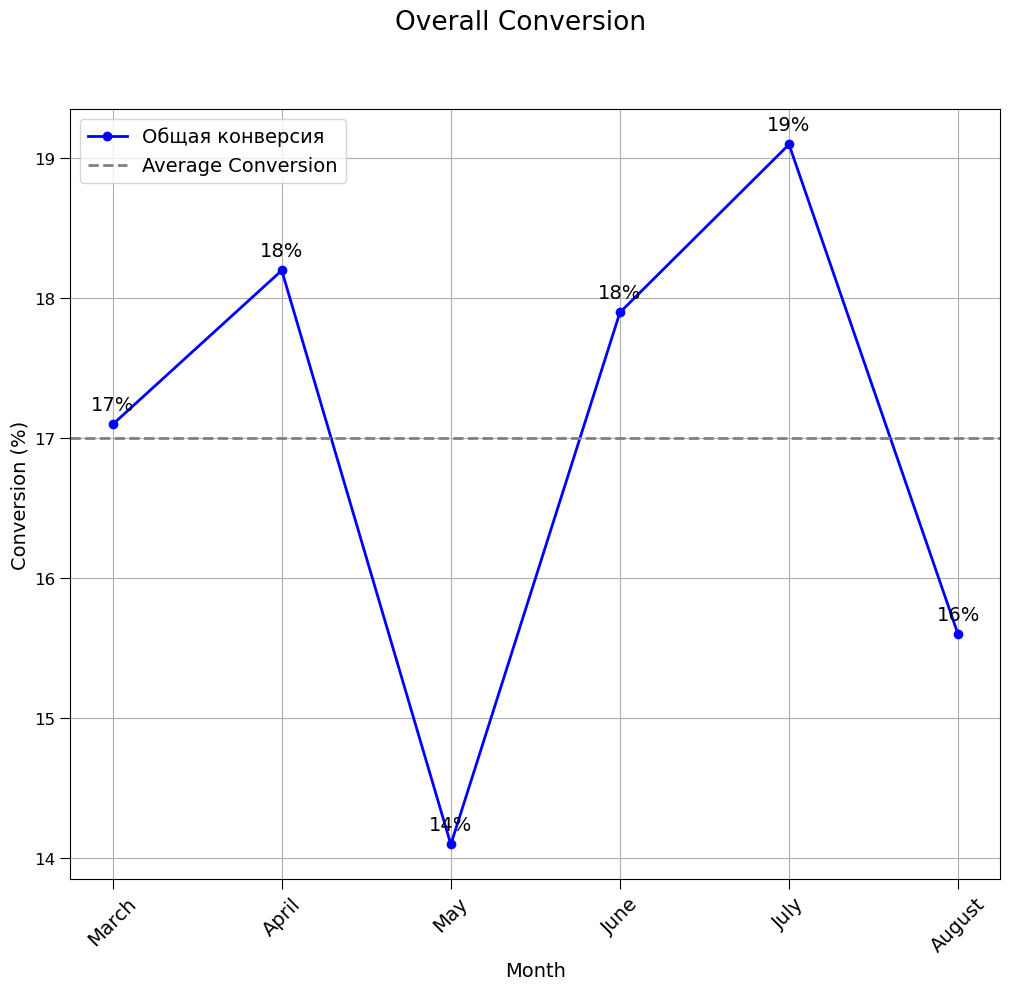

In [55]:
# для 14-го слайда с графиком Overall Conversion
overall_conversion = cnv_ads.copy()

overall_conversion['date_group'] = overall_conversion['date_group'].astype('datetime64[ns]')
overall_conversion['month'] = pd.DatetimeIndex(overall_conversion['date_group']).month

overall_conversion = overall_conversion.drop(['date_group'], axis=1)
overall_conversion = overall_conversion[['month', 'visits', 'registrations', 'cost', 'utm_campaign']]
overall_conversion = overall_conversion.groupby(['month'])[['visits', 'registrations']].sum().reset_index()
overall_conversion['overall_conversion'] = (overall_conversion['registrations'] / overall_conversion['visits'] * 100).round(1)

fig, ax = plt.subplots()
fig.set_size_inches(12,10)
fig.suptitle('Overall Conversion', fontsize=19)
x = overall_conversion['month']
y = overall_conversion['overall_conversion']
ax.plot(x, y,
        marker="o",
        c="b",
        label='Общая конверсия',
        linewidth=2,
        markersize=6)
for x,y in zip(x,y):
    label = "{:.0f}%".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                fontsize=14)
mean_conversion = overall_conversion['overall_conversion'].mean()
ax.axhline(y=mean_conversion, color='gray', linestyle='dashed', linewidth=2, label='Average Conversion')
# ax.legend()
ax.legend(fontsize=14, loc='upper left')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Conversion (%)', fontsize=14)
# ax.xaxis.set_major_locator(MultipleLocator(5))
ax.tick_params(axis='both', labelsize=12, which='major', length=7)
ax.set_xticks(overall_conversion['month']) # добавила
ax.set_xticklabels(['March', 'April', 'May', 'June', 'July', 'August'], fontsize=14, rotation=45) # добавила
# plt.xticks(rotation=45)
ax.grid()
plt.savefig('./charts_for_presentation/Overall_conversion_chart.png')

In [67]:
avg_conversion = overall_conversion['overall_conversion'].mean()
print(avg_conversion)

17.0
